u = [-0.0072892  -0.54340652  0.41480449 -0.64780223  0.33607399]
D = [ 11.47337804   9.20468619   7.54950789   5.76650699   3.70703765]
μ = [ 11.47317532   8.42445296   6.9155479    4.0316884 ]


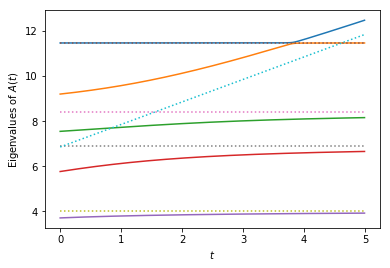

In [96]:
from rk1pert import *
import matplotlib.pyplot as plt
%matplotlib inline

n = 5
dmin = 0
dmax = 20
tmin = 0
tmax = 5
tstep = .01
plot_asymptotes = True

D = rand_diag(n, dmin, dmax)
u = rand_unit_vector(n)
U = np.outer(u, u)
print("u = " + str(u))
print("D = " + str(np.diag(D)))
A = pencil(D, U)

x, y = get_data_points(A, tmin, tmax, tstep)
for i in range(n):
    plt.plot(x, y[i])
plt.xlabel(r"$t$")
plt.ylabel(r"Eigenvalues of $A(t)$")

# Asymptotes
if plot_asymptotes:
    U, s, V = np.linalg.svd(U) # U will now contain an extension of u to an orthonormal basis for R^n
    U = U[:, 1:]
    S = U.T.dot(D).dot(U)
    mu = np.linalg.eigvalsh(S)
    mu.sort()
    mu = mu[::-1]
    print(u"\u03bc = " + str(mu))
    for y in mu:
        plt.plot(x, y * np.ones(len(x)), ':')
    
    plt.plot(x, D.dot(u).dot(u) + x, ':')

plt.show()

In [100]:
output = open("2018-07-24-16:13.txt", "w")
output.write("u = " + str(u))
output.write("\nD = " + str(np.diag(D)))
output.write("\nmu = " + str(mu))
output.close()